In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets
import os

In [6]:
# Get data
data_dir = "/Users/dj/Documents/GitHub/project-neurocloud/data/golf_df.csv"

In [7]:
dat = pd.read_csv(data_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dj/Documents/GitHub/project-neurocloud/data/golf_df.csv'

In [8]:
dat.info()

NameError: name 'dat' is not defined

In [ ]:
for col in dat.columns:
    dat[col] = dat[col].astype('category')

targets = [{'no': 0, 'yes': 1}.get(i, 'none') for i in list(dat['Play'])]
dat["Play"] = targets

dat["Play"]  = dat["Play"].astype('int64')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = dat.iloc[:, 0:-1] # petal length and width y = iris.target
y = dat.loc[:, "Play"]
tree_clf = DecisionTreeClassifier(max_depth=4)

one_hot_data = pd.get_dummies(dat[['Outlook', 'Temperature', 'Humidity', 'Windy']],drop_first=True)
tree_clf.fit(one_hot_data, dat['Play'])

DecisionTreeClassifier(max_depth=4)

In [ ]:
# targets = [{'no': 0, 'yes': 1}.get(i, 'none') for i in list(dat['Play'])]
# dat["Play"] = targets

In [ ]:
dat["Play"]  = dat["Play"].astype('string')

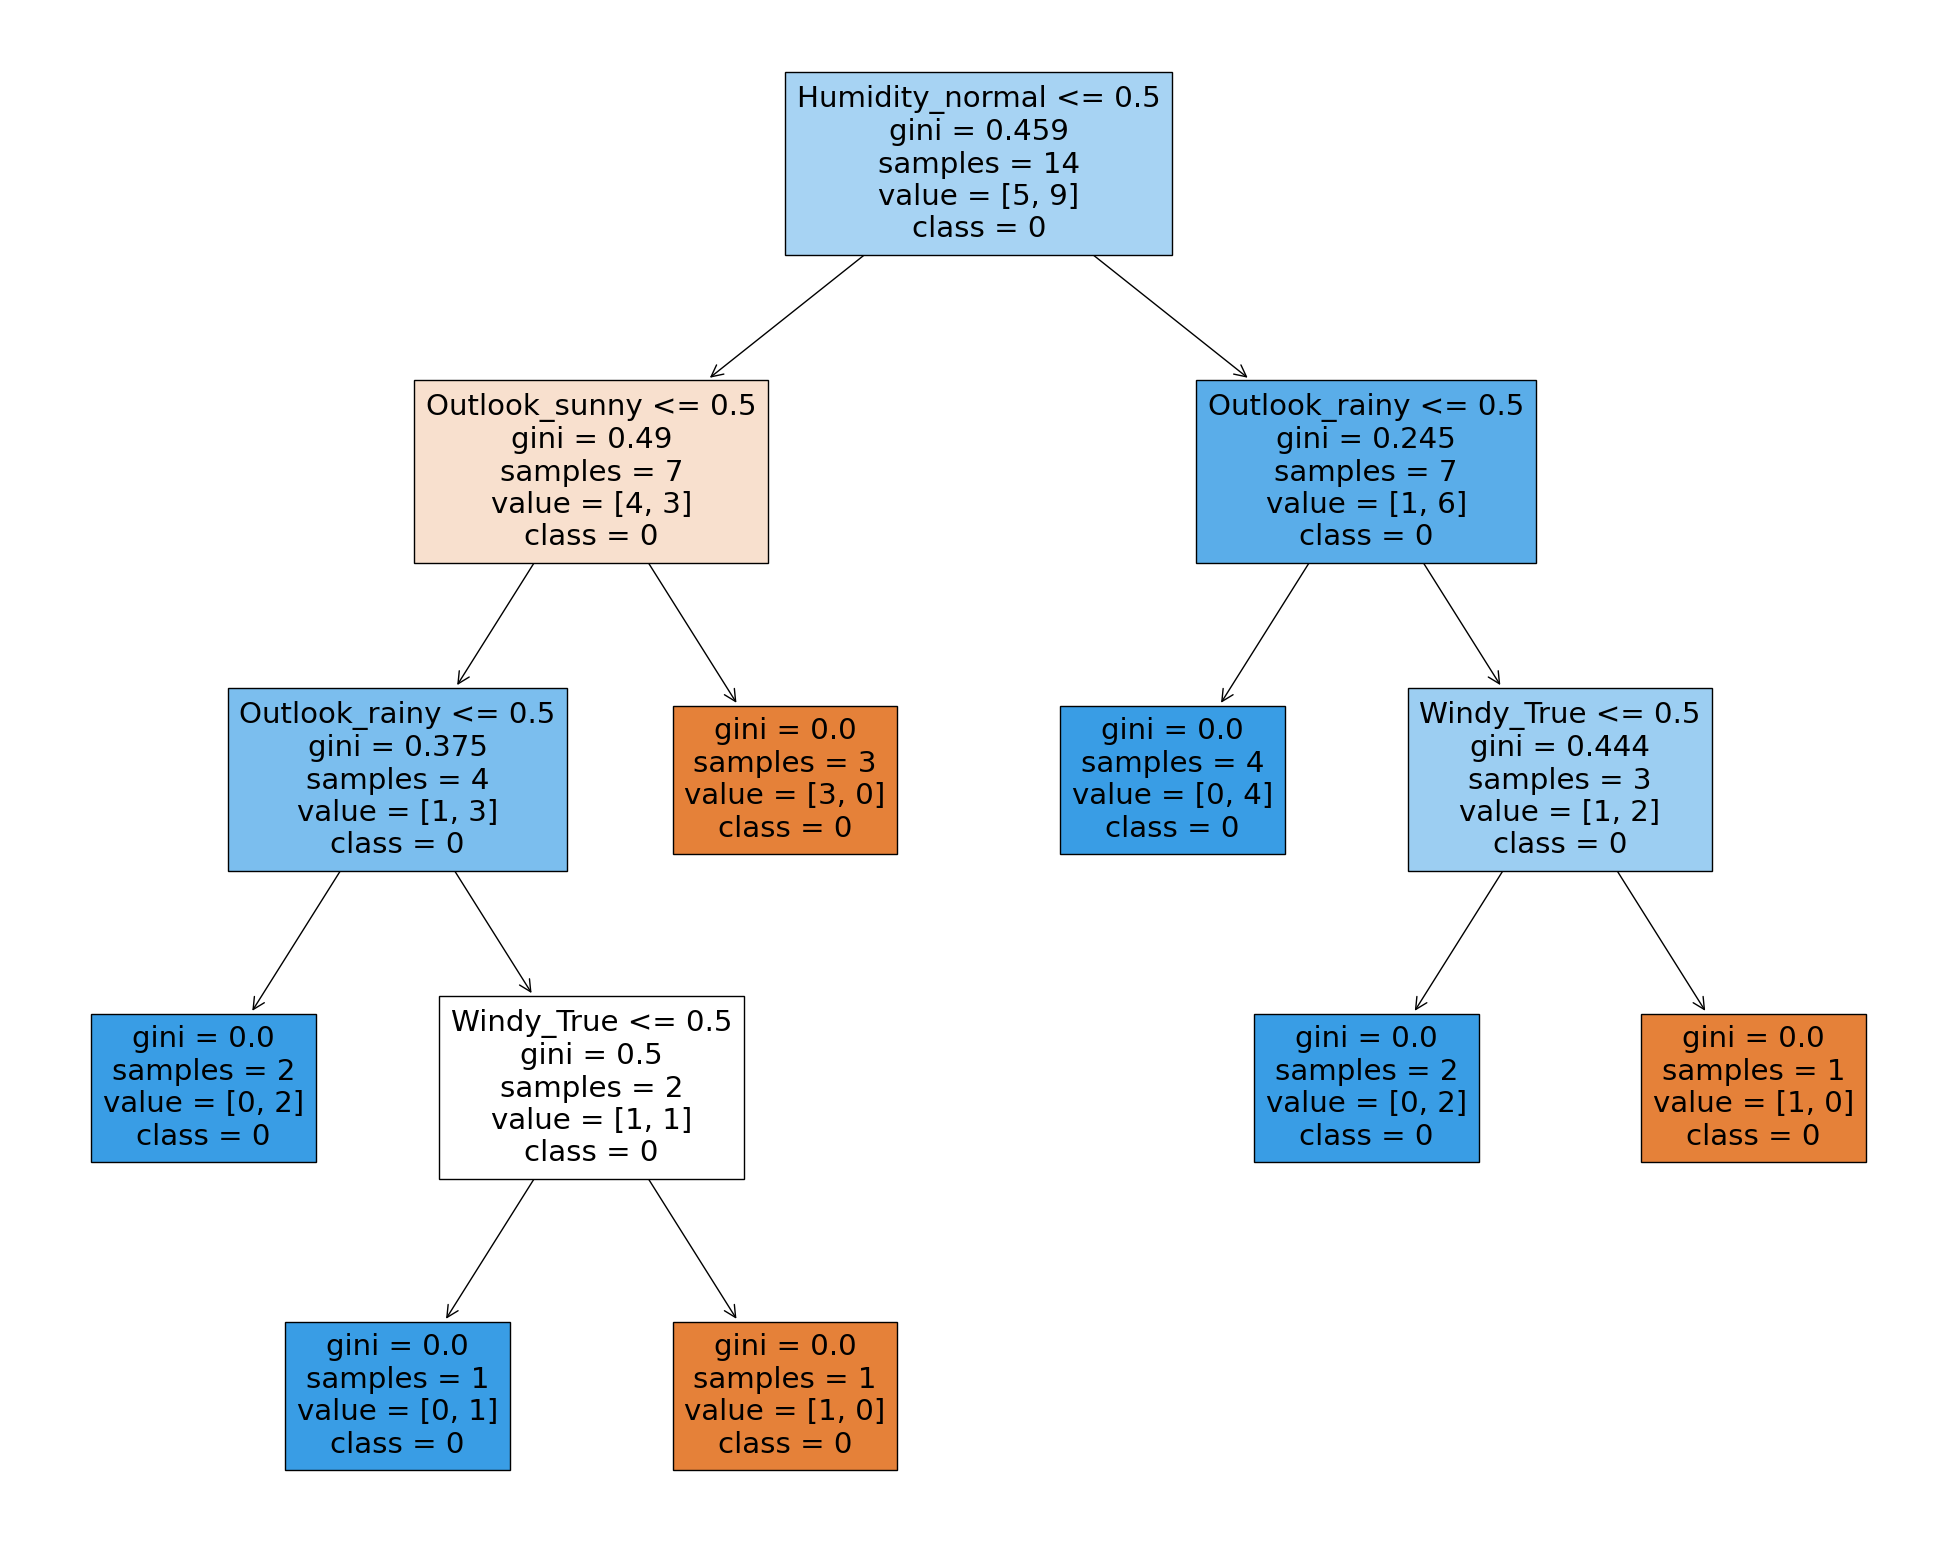

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=list(one_hot_data.columns),  
                   class_names=np.array(dat['Play']),
                   filled=True)

# Another attempt with wine data 

In [13]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)

X = data.frame.loc[:, ['alcohol', 'color_intensity']]
y = data.frame.iloc[:, -1:]

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

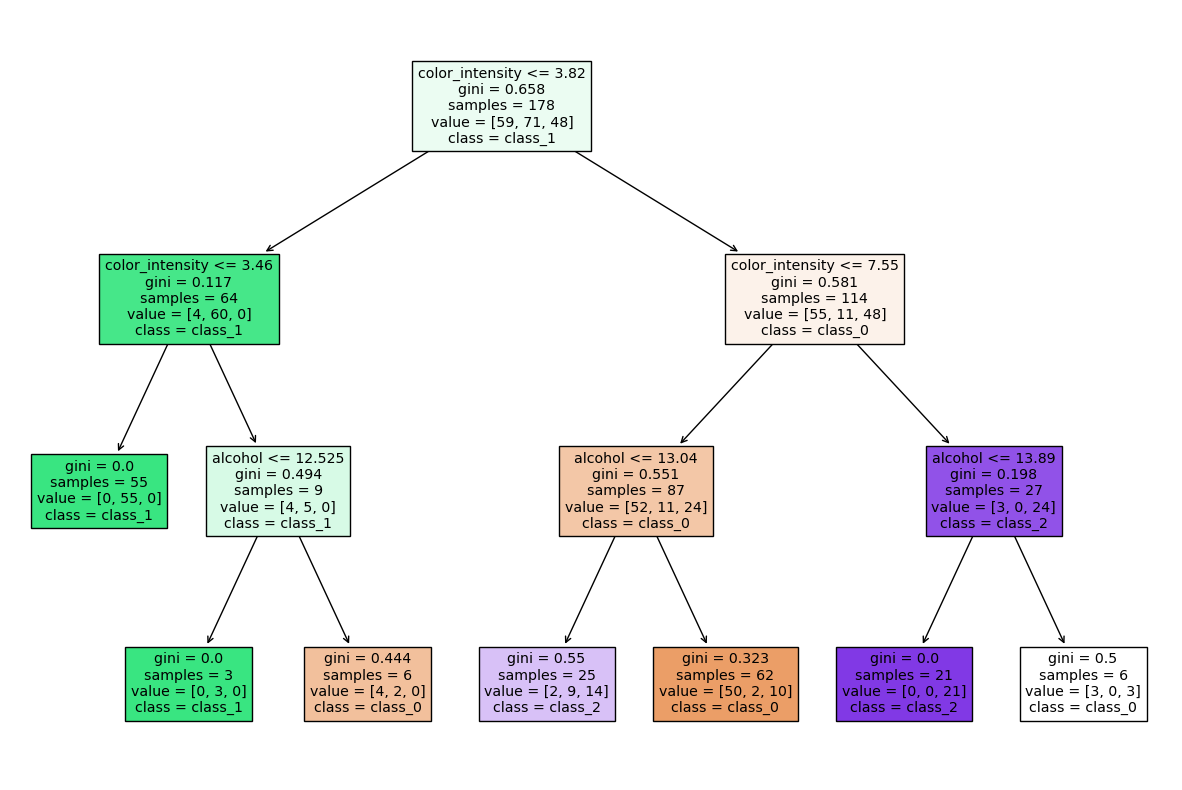

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_clf, 
                   feature_names=['alcohol', 'color_intensity'],  # wine.feature_names
                   class_names=['class_0', 'class_1', 'class_2'], # wine.target_names
                   filled=True)

In [16]:
data.frame.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [17]:
wine.target_names

NameError: name 'wine' is not defined

In [18]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier?


Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al

In [21]:
from graphviz import Source
from sklearn.tree import export_graphviz

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "wine_tree.dot"),
        feature_names=['alcohol', 'color_intensity'],  # wine.feature_names
        class_names=['class_0', 'class_1', 'class_2'], # wine.target_names
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "wine_tree.dot"))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH